In [3]:
import csv
from collections import defaultdict

import numpy as np

In [200]:
import matplotlib.pyplot as plt

In [4]:
dataset = defaultdict(list)

with open('data.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    for i, row in enumerate(reader):
        if i == 0:
            cols = row
            continue
        for i, val in enumerate(row):
            dataset[cols[i]].append(float(val))
            

In [312]:
def scale_data(X):
    X = np.array(X)
    return (X - X.min()) / (X.max() - X.min())

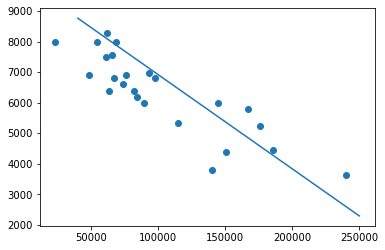

In [248]:
plt.scatter(dataset['km'], dataset['price'])
x = np.linspace(40000, 250000, 10000)
plt.plot(x, 10000 + -0.030808131 * x)

In [8]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [323]:
class RegressionModel:
    """
    RegressionModel common class for model training and predicting
    """
    
    def __init__(
        self,
        lr=7e-3, 
        tol=1e-3,
        niter_no_change=10,
        debug=False
    ):
        self.theta = None
        self.tol = tol
        self.lr = lr
        self.niter_no_change = niter_no_change
        self.debug = debug
        
    def fit(self, X, y, epochs=200):
        """
        Func for model train
        """
        if isinstance(X, list):
            X = np.array(X)
#             X = np.vstack([np.ones_like(X), X])
        if isinstance(y, list):
            y = np.array(y)
        
        self.theta0 = 0
        self.theta1 = float(np.random.rand(1))
#         print(X.T @ self.theta)
        
        prev_loss = float('inf')
        y_pred = self.predict(X)
        loss = mse(y, y_pred)
        mae_loss = mae(y, y_pred)
        loss_dict = defaultdict(list)
        
        if self.debug:
            print(f'Init MSE loss: {loss}, MAE loss: {mae_loss}')
        
        
        while abs(loss - prev_loss) > self.tol and epochs:
            epochs -= 1
            prev_loss = loss
            self.theta1 -= self.lr * np.mean(X * (y_pred - y))
            self.theta0 -= self.lr * np.mean(y_pred - y)
            y_pred = self.predict(X)
            loss = mse(y, y_pred)
            if self.debug:
                print(f'MSE loss: {loss}, MAE loss: {mae(y, y_pred)}')
            
        
        
    def predict(self, X, y=None):
        assert self.theta1 is not None # "Model is not trained"
        
        y_pred = self.theta0 + self.theta1 * X
        
        return y_pred
        

In [324]:
model = RegressionModel(debug=True)

In [325]:
dataset['km_scaled'] = scale_data(dataset['km'])

In [326]:
model.fit(dataset['km_scaled'], dataset['price'])

Init MSE loss: 41757780.324597605, MAE loss: 6331.542521652821
MSE loss: 41142042.2891593, MAE loss: 6282.138355341182
MSE loss: 40536034.46390861, MAE loss: 6233.126857568811
MSE loss: 39939602.678548895, MAE loss: 6184.504904830861
MSE loss: 39352595.20581908, MAE loss: 6136.269398469481
MSE loss: 38774862.72278034, MAE loss: 6088.417264476145
MSE loss: 38206258.27271617, MAE loss: 6040.945453295576
MSE loss: 37646637.22763622, MAE loss: 5993.850939631229
MSE loss: 37095857.2513743, MAE loss: 5947.130722252307
MSE loss: 36553778.26327115, MAE loss: 5900.781823802335
MSE loss: 36020262.40243279, MAE loss: 5854.801290609223
MSE loss: 35495173.992555074, MAE loss: 5809.1861924968825
MSE loss: 34978379.507305816, MAE loss: 5763.933622598303
MSE loss: 34469747.53625541, MAE loss: 5719.040697170142
MSE loss: 33969148.75134733, MAE loss: 5674.50455540877
MSE loss: 33476455.873899966, MAE loss: 5630.322359267798
MSE loss: 32991543.642131355, MAE loss: 5586.491293277039
MSE loss: 32514288.779